# Assignment 2

***

## Question 1: Neural Codes & Nearest Neighbor retrieval (7.5pt)
The Caltech101 dataset consists of images of 101 different objects. In this question you will develop an image retrieval system using image representations (neural codes) learned with a deep convolutional neural network and a given distance metric.

In the tasks below you will need to implement the following steps:

* Retrieval for $n$ selected (distinct) query images from the dataset
    * For each query image, obtain the 5 most similar images (excluding the query image itself!)
* Evaluation of the quality of the retrieval 
    * The Caltech101 images are annotated with their object class. Use these annotations to evaluate the accuracy of the retrieval task.
    * For each query image, count the number of images whose class corresponds to the one from the query. The score of the retrieval for that image then ranges between:
        * **5** *all* retrieved images' classes agree with the query image class
        * **0** *none* of the images' classes agree with the query image class
    * Compute the average of all $n$ queries

***

### Task 1.1:  Neural codes image retrieval
**a)** Implement the retrieval task and evaluate the results for $n=200$ images. Use the provided VGG16 network pre-trained on ImageNet to compute "neural codes" and L2-distance. Specifically use the codes produces by the following layers of the model: 
1. the "fc1"-layer
2. the "fc2"-layer

Provide the retrieval evaluation scores for both tasks.

In [1]:
import tensorflow as tf
print(tf.test.gpu_device_name())
!pip install -q keras==2.1.3

/device:GPU:0


In [0]:
# you'll need these imports:
from sklearn.neighbors import NearestNeighbors
import os
import numpy as np
import pickle

In [0]:
# Load data

In [18]:
# NOTE: you will first need to apply some changes to "Practical-3.3.0_preprocess-caltech101.ipynb" and run it
#       to obtain a pickle file with "fc1"-features. You don't need to show these changes here.


# make random selection of n query images/indices, the same for all experiments
n = 200
n_examples = 8677  # the dataset has 8677 images
indices = np.random.choice(range(n_examples), size=n, replace=False)

# iterate over two data representations (make sure these two files exist in the "data" subfolder first)
for datapath in ("caltech101_VGG16_fc1.p", "caltech101_VGG16_fc2.p"):
    # load the dataset
    with open(os.path.join("data", datapath), "rb") as f:
        X_fc, y, X_paths, classes = pickle.load(f)


    # === SOLUTION: ===
    # insert code here
    

FileNotFoundError: ignored

***

**b)** Which representation ("neural code") provided better features for the given retrieval task? 
Justify your answer and discuss possible reasons for the observed results. Relate your answer to the conclusions in the paper "Neural Codes for Image Retrieval".

**Answer:**

*=== write your answer here ===*

***

### Task 1.2: Detailed evaluation
**a)** The retrieval scores can vary from one query image to another. Some images are quite representative and for them retrieval works well, some are not so much.
For the same retrieval task given above using "fc2"-features, find (if possible) six query images such that they range from excellent to poor retrieval performance. More specifically find example query images that result in query scores of exactly 0, 1, 2, 3, 4, and 5.

Visualise the six (or less) resulting query images.

In [3]:
# you'll need these extra imports:
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
# load the dataset
datapath = "caltech101_VGG16_fc2.p"
with open(os.path.join("data", datapath), "rb") as f:
    X_fc, y, X_paths, classes = pickle.load(f)

# you can use this simple function to visualise an image, given a filepath
def show_img(filepath):
    img = image.load_img(filepath, target_size=(224,224))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
# example usage given some index < 8677:
#index = 254
#show_img(X_paths[index])


# === SOLUTION: ===
# insert code here

***

**b)** Looking at the results, what can you say about the "types" of images that obtain good retrieval scores compared to those obtaining poor retrieval scores? Give an explanation and possible solution(s).

(*HINT: How did we obtain data representations for similarity measures?*)

**Answer:**

*=== write your answer here ===*

***

### Task 1.3: Subjective evaluation
We will now use the "fc2"-features to do image retrieval for query images from the "BACKGROUND_Google" set from the Caltech101 dataset. These images are not associated to a particular class, so we will evaluate them subjectively instead.

**a)** Find two query images from the "BACKGROUND_Google" class, such that for the first query image relevant/similar images are retrieved (according to your own definition of relevancy/similarity), and for the second image mainly irrelevant/dissimilar images are retrieved. For each of them, visualise its 5 nearest neighbors in the Caltech101 dataset (*so do NOT retrieve images from the "BACKGROUND_Google" class!*), according to the "fc2-features" and L2-distance.

In [0]:
# load the BACKGROUND_Google set
with open(os.path.join("data","caltech101_VGG16_fc2_bg.p"), "rb") as f:
    bg_fc2, bg_paths = pickle.load(f)


# === SOLUTION: ===
# insert code here

***

**b)** Motivate your idea of "relevance": why do you consider the results for the first image relevant/similar, and those for the second image irrelevant/dissimilar?

**Answer:**

*=== write your answer here ===*

***

**c)** Explain why you think this retrieval method (nearest neighbor for neural codes from VGG16) performs better on the first image than on the second.

**Answer:**

*=== write your answer here ===*

***

### Task 1.4: Dimensionality reduction

**a)** So far we've been using 4096-dimensional neural codes. This space is however still quite high-dimensional. Apply a dimensionality reduction method and evaluate the effect on the retrieval performance.

* Use PCA to obtain lower-dimensional representations of the Caltech101 data "fc2"-features (try the same compression rates as in Table 2 of the "Neural Codes for Image Retrieval" paper).
* Evaluate the same retrieval task as explained at the start of this question for each of the compression rates/dimensionalities. Report the retrieval scores.

*HINT: See http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html on how to transform a dataset with PCA.*

In [0]:
# import PCA from scikit-learn
from sklearn.decomposition import PCA

In [0]:
# load the data
datapath = "caltech101_VGG16_fc2.p"
with open(os.path.join("data", datapath), "rb") as f:
    X_fc, y, X_paths, classes = pickle.load(f)
    
# make random selection of n query images/indices, the same for all experiments
n = 200
n_examples = 8677  # the dataset has 8677 images
indices = np.random.choice(range(n_examples), size=n, replace=False)


# === SOLUTION: ===
# insert code here

***

**b)** Discuss your results: how much can you further reduce the dimensionality of the data representations, without affecting the retrieval performance (much)? Compare these results to those from the paper, are your conclusions similar or not?

**Answer:**

*=== write your answer here ===*

***

## Question 2: Fashion-MNIST (12.5pt)
For this question we will work with the "Fashion-MNIST" dataset. This dataset is modelled to have the same specifics as MNIST; it consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each example is a 28x28 greyscale image, associated with a label from one of 10 classes. The images represent various clothing items (as opposed to handwritten digits for MNIST), each class represents a different type of clothing item. The following classes exist:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

In this question we will investigate various ways to model visual similarity for this dataset, in order to perform image retrieval. For more info about the dataset, see https://github.com/zalandoresearch/fashion-mnist.

The dataset can directly be obtained through Keras:

4423680/4422102 [==============================] - 4s 1us/step
X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


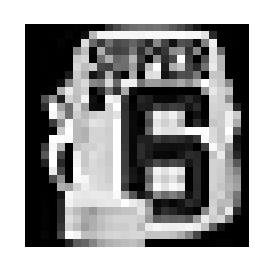

Class: Bag (8)


In [4]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import backend as K

# load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# properties of the data
img_rows, img_cols, chns = 28, 28, 1
n_classes = 10

# reshape
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], chns, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], chns, img_rows, img_cols)
    input_shape = (chns, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, chns)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, chns)
    input_shape = (img_rows, img_cols, chns)

# normalise
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

# transform labels to one-hot encoding, but also keep original single-digit encoding
y_train_digits = y_train
y_test_digits = y_test
y_train = to_categorical(y_train_digits, n_classes)
y_test = to_categorical(y_test_digits, n_classes)

print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# show an example
example_id = 6000  # pick any integer from 0 to 59999 to visualize a training example
example = x_train[example_id].reshape(img_rows, img_cols)
label = y_train[example_id]
label_digit = y_train_digits[example_id]
label_class = classes[label_digit]
plt.matshow(example, cmap="gray")
plt.axis("off")
plt.show()
print("Class: {} ({})".format(label_class, label_digit))

Consider the following situation: We have a fully labelled dataset (the ***labelled set***) of the images from the first 5 classes (t-shirts/tops, trousers, pullovers, dresses, coats). We are then supplied with an unlabelled dataset (the ***retrieval set***) containing the remaining Fashion-MNIST images (sandals, shirts, sneakers, bags, ankle boots) on which we want to be able to perform image retrieval. So we cannot use labels from the retrieval set, since we do not know them (note that in our case we *do* have the labels, but we will only use them for evaluation).

The following code splits the dataset up into two sets representing 5 classes each. Observe that the labelled and the retrieval set have exactly the same size.

In [5]:
# obtain indices of labelled and retrieval sets
indices_train_l = np.argwhere(y_train_digits < 5).flatten()  # indices labelled training set
indices_train_r = np.argwhere(y_train_digits >= 5).flatten()  # indices retrieval training set
indices_test_l = np.argwhere(y_test_digits < 5).flatten()  # indices labelled test set
indices_test_r = np.argwhere(y_test_digits >= 5).flatten()  # indices retrieval test set

# split up train and test set (images and labels)
x_train_l = x_train[indices_train_l]
x_train_r = x_train[indices_train_r]
y_train_l = y_train[indices_train_l]
y_train_r = y_train[indices_train_r]
y_train_digits_l = y_train_digits[indices_train_l]
y_train_digits_r = y_train_digits[indices_train_r]
x_test_l = x_test[indices_test_l]
x_test_r = x_test[indices_test_r]
y_test_l = y_test[indices_test_l]
y_test_r = y_test[indices_test_r]
y_test_digits_l = y_test_digits[indices_test_l]
y_test_digits_r = y_test_digits[indices_test_r]

# labels are now one-hot encoded 10-dimensional vectors, but only the first or last five dimensions are used
# omit unused dimensions to obtain 5-dimensional one-hot encodings
y_train_l = y_train_l[:, :5]
y_train_r = y_train_r[:, 5:]
y_test_l = y_test_l[:, :5]
y_test_r = y_test_r[:, 5:]
# (note that the dimensions of y_train_l/y_test_l do not correspond to those of y_train_r/y_test_r now)

# print the shapes
print(x_train_l.shape)
print(x_train_r.shape)
print(y_train_l.shape)
print(y_train_r.shape)
print(y_train_digits_l.shape)
print(y_train_digits_r.shape)
print(x_test_l.shape)
print(x_test_r.shape)
print(y_test_l.shape)
print(y_test_r.shape)
print(y_test_digits_l.shape)
print(y_test_digits_r.shape)

(30000, 28, 28, 1)
(30000, 28, 28, 1)
(30000, 5)
(30000, 5)
(30000,)
(30000,)
(5000, 28, 28, 1)
(5000, 28, 28, 1)
(5000, 5)
(5000, 5)
(5000,)
(5000,)


***

### Task 2.1: Fashion neural retrieval
**a)** Design an MLP (multilayer perceptron) for classification on the first 5 classes of the Fashion-MNIST dataset (i.e. only use `x_train_l` for training). You may include Dropout and BatchNormalization if needed. Let the last hidden dense layer (before the 5-dimensional output layer) have 128 dimensions. (*HINT: you can use* `name="neural_codes"` *for this layer to make it easier to obtain features from it later.*)

Train it to classify images into their corresponding classes. Make sure that it achieves decent accuracy (at least 90%) on the labelled test set `x_test_l` (show this!). Save the trained model to a ".h5" file. (make sure you're using Keras version 2.1.3!)

In [0]:
# import sequential model and layers
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense, Reshape, InputLayer, MaxPool2D, Dropout
from keras.initializers import Constant

In [7]:
mlp = Sequential()

# encoder
mlp = Sequential()
mlp.add(Flatten(input_shape=(28,28,1)))
mlp.add(Dropout(0.13))
mlp.add(BatchNormalization())
mlp.add(Dense(128, activation = "relu", name="neural_codes"))
mlp.add(Dense(5, input_dim=128, activation='softmax'))

mlp.summary()
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
neural_codes (Dense)         (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 104,261
Trainable params: 102,693
Non-trainable params: 1,568
_________________________________________________________________


In [8]:
batch_size = 30
epochs = 10

mlp.fit(x_train_l,  y_train_l,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test_l, y_test_l)
       )

Train on 30000 samples, validate on 5000 samples
Epoch 1/10
30000/30000 [==============================] - 7s 227us/step - loss: 0.1414 - acc: 0.9439 - val_loss: 0.1213 - val_acc: 0.9530
Epoch 2/10
30000/30000 [==============================] - 7s 221us/step - loss: 0.1124 - acc: 0.9554 - val_loss: 0.1070 - val_acc: 0.9594
Epoch 3/10
30000/30000 [==============================] - 7s 219us/step - loss: 0.1023 - acc: 0.9607 - val_loss: 0.1088 - val_acc: 0.9573


Epoch 4/10
30000/30000 [==============================] - 7s 220us/step - loss: 0.0970 - acc: 0.9619 - val_loss: 0.1065 - val_acc: 0.9586
Epoch 5/10
30000/30000 [==============================] - 7s 219us/step - loss: 0.0926 - acc: 0.9639 - val_loss: 0.1014 - val_acc: 0.9612
Epoch 6/10
30000/30000 [==============================] - 7s 220us/step - loss: 0.0894 - acc: 0.9647 - val_loss: 0.1025 - val_acc: 0.9600
Epoch 7/10
 8520/30000 [=======>......................] - ETA: 4s - loss: 0.0874 - acc: 0.9650

30000/30000 [==============================] - 6s 214us/step - loss: 0.0858 - acc: 0.9661 - val_loss: 0.1058 - val_acc: 0.9609
Epoch 8/10
30000/30000 [==============================] - 7s 217us/step - loss: 0.0834 - acc: 0.9672 - val_loss: 0.1061 - val_acc: 0.9614
Epoch 9/10
30000/30000 [==============================] - 7s 219us/step - loss: 0.0809 - acc: 0.9686 - val_loss: 0.1052 - val_acc: 0.9634
Epoch 10/10
12480/30000 [===========>..................] - ETA: 3s - loss: 0.0761 - acc: 0.9716

30000/30000 [==============================] - 7s 220us/step - loss: 0.0795 - acc: 0.9698 - val_loss: 0.1026 - val_acc: 0.9655


In [0]:
from google.colab import files
mlp.save("mlp_fashionmnist_l.h5")

#files.download("mlp_fashionmnist_1.h5")


***

**b)** Briefly motivate how and why you chose this architecture.

**Answer:**

We chose for the above structure because partially trial and error and from our knowledge both obtained during this course aswell as other courses. Our first layer is a Flatten layer, this layer makes sure that the data structure has the correct shape for the next layers in our model. Our second layer is a Dropout layer, this layer is there to prevent overfitting. During the buidling of our network we had the feeling that it was overfitting so we added a layer to deal with it. The thrid layer is used for normalization. It uses the Batch normalization as proposed by (Ioffe and Szegedy, 2014). Finally we use two dense layers as specified by the assignment. The first dense layer we found out via trail and error that relu was the best activation for it and as specified in the assignment the output of this layer has 128 dimensions. In the last layer we use Softmax as activation and specifiy that the output has to be of 5 dimensions. 


Using the hereby explained neural network we obtained an accuracy of 97% as can be seen above.

***

### Task 2.2: Fashion neural retrieval #2
**a)** Design a CNN (convolutional neural network) for classification on the first 5 classes of the Fashion-MNIST dataset (i.e. only use x_train_l for training), consisting of a number of Convolutions with Max-Pooling, followed by one or more Dense layers. You may use Dropout and BatchNormalization to improve generalization and training speed. Let the last hidden dense layer (before the 5-dimensional output layer) have 128 dimensions. (*HINT: you can use* `name="neural_codes"` *for this layer to make it easier to obtain features from it later.*)

Train the CNN to classify images into their corresponding classes. Make sure that it achieves decent accuracy (at least 94%) on the test set `x_test_l` (show this!). Save the trained model to a ".h5" file. (make sure you're using Keras version 2.1.3!)

In [0]:
# import additional layers
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense, Reshape, InputLayer, MaxPool2D, Convolution2D, Dropout


In [11]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2), padding="same"))
cnn.add(Flatten())
cnn.add(Dropout(0.17))
cnn.add(BatchNormalization())
cnn.add(Dense(128,activation='relu',name='neural_codes'))
cnn.add(Dense(5,activation='softmax'))

cnn.summary()
cnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5408)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 5408)              21632     
_________________________________________________________________
neural_codes (Dense)         (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total para

In [12]:
batch_size = 30
epochs = 10

cnn.fit(x_train_l,  y_train_l,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test_l, y_test_l)
       )

Train on 30000 samples, validate on 5000 samples
Epoch 1/10
30000/30000 [==============================] - 12s 402us/step - loss: 0.1091 - acc: 0.9584 - val_loss: 0.0872 - val_acc: 0.9690
Epoch 2/10
30000/30000 [==============================] - 11s 367us/step - loss: 0.0745 - acc: 0.9715 - val_loss: 0.0824 - val_acc: 0.9720
Epoch 3/10
 6180/30000 [=====>........................] - ETA: 8s - loss: 0.0615 - acc: 0.9771

30000/30000 [==============================] - 11s 362us/step - loss: 0.0616 - acc: 0.9760 - val_loss: 0.0812 - val_acc: 0.9726
Epoch 4/10
30000/30000 [==============================] - 11s 367us/step - loss: 0.0530 - acc: 0.9799 - val_loss: 0.0784 - val_acc: 0.9742
Epoch 5/10
18840/30000 [=================>............] - ETA: 3s - loss: 0.0434 - acc: 0.9839

30000/30000 [==============================] - 11s 366us/step - loss: 0.0446 - acc: 0.9834 - val_loss: 0.0960 - val_acc: 0.9711
Epoch 6/10
30000/30000 [==============================] - 11s 363us/step - loss: 0.0394 - acc: 0.9845 - val_loss: 0.0863 - val_acc: 0.9742
Epoch 7/10
21840/30000 [====================>.........] - ETA: 2s - loss: 0.0336 - acc: 0.9869

30000/30000 [==============================] - 11s 364us/step - loss: 0.0356 - acc: 0.9864 - val_loss: 0.1661 - val_acc: 0.9586
Epoch 8/10
30000/30000 [==============================] - 11s 364us/step - loss: 0.0325 - acc: 0.9877 - val_loss: 0.1030 - val_acc: 0.9735
Epoch 9/10
22920/30000 [=====================>........] - ETA: 2s - loss: 0.0280 - acc: 0.9900

30000/30000 [==============================] - 11s 360us/step - loss: 0.0287 - acc: 0.9896 - val_loss: 0.1190 - val_acc: 0.9708
Epoch 10/10
30000/30000 [==============================] - 11s 366us/step - loss: 0.0247 - acc: 0.9908 - val_loss: 0.1206 - val_acc: 0.9710


In [0]:
from google.colab import files
cnn.save("cnn_fashionmnist_l.h5")

#files.download("cnn_fashionmnist_1.h5")

***

**b)** Briefly motivate how and why you chose this architecture.

**Answer:**

For the architecture of the convolunational neural network we choose for only one convolutional layer and only one maxPooling2D layer. Because using trial and error we found that that was the best. Adding more layers both convolutional as maxpooling layers did not further improve the accuracy.  The rest of the architecture looks very similair to the architecture of our MLP network. We thought that if it worked quite well with out the maxPooling it might as well work after maxPooling. So we tried that and immediately found that the accuracy reached the 97% with ony one Conv2D layer and one maxPooling2D layer.

***

### Task 2.3: Fashion neural retrieval #3
**a)** Design a (convolutional) Denoising Autoencoder (DAE) for the *full* Fashion-MNIST dataset (i.e. use `x_train`, *not* `x_train_l`). For the encoder, use only Convolutional layers and Max-Pooling, followed by a Dense layer with 128 units. The output of this layer will be the "code" of the autoencoder (*HINT: you can use* `name="neural_codes"` *for this layer to make it easier to obtain features from it later*). For the decoder, start with a Dense layer to upscale to a suitable dimension, and then use only Convolutional layers and UpSampling. You may use BatchNormalization to speed up training.

Train the DAE to reconstruct noisy images to the original input images. Make sure that it achieves a binary cross-entropy loss of at most 0.29 on the test set (show this!). Save the trained model to a ".h5" file. (make sure you're using Keras version 2.1.3!)

In [0]:
# import additional layer
from keras.layers import UpSampling2D, Reshape



In [15]:
# obtain noisy version of data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


# define autoencoder
dae = Sequential()

# === SOLUTION: ===
# encoder
dae.add(Conv2D(32, (3, 3), activation='elu', padding='same', input_shape=input_shape))
dae.add(MaxPooling2D((2, 2), padding='same'))
dae.add(BatchNormalization())
dae.add(Conv2D(32, (3, 3), activation='elu', padding='same'))
dae.add(MaxPooling2D((2, 2), padding='same'))
dae.add(BatchNormalization())
dae.add(Flatten())  
dae.add(Dense(128, activation='elu', name="neural_codes"))  


# decoder
dae.add(Dense(1568))  
dae.add(Reshape((7, 7, 32)))
dae.add(Conv2D(32, (3, 3), activation='elu', padding='same'))
dae.add(UpSampling2D((2, 2)))
dae.add(BatchNormalization())
dae.add(Conv2D(32, (3, 3), activation='elu', padding='same'))
dae.add(UpSampling2D((2, 2)))
dae.add(BatchNormalization())
dae.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

dae.summary()
dae.compile(optimizer='adam', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
__________

In [16]:
batch_size = 32
epochs = 10

dae.fit(x_train_noisy, x_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_split=1/12)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 36s 656us/step - loss: 0.3093 - val_loss: 0.2946
Epoch 2/10
10112/55000 [====>.........................] - ETA: 26s - loss: 0.2926

55000/55000 [==============================] - 34s 610us/step - loss: 0.2917 - val_loss: 0.2909
Epoch 3/10
36416/55000 [==================>...........] - ETA: 11s - loss: 0.2882

55000/55000 [==============================] - 34s 613us/step - loss: 0.2882 - val_loss: 0.2914
Epoch 4/10
46784/55000 [========================>.....] - ETA: 4s - loss: 0.2861

55000/55000 [==============================] - 34s 612us/step - loss: 0.2861 - val_loss: 0.2876
Epoch 5/10
50912/55000 [==========================>...] - ETA: 2s - loss: 0.2847

55000/55000 [==============================] - 33s 608us/step - loss: 0.2847 - val_loss: 0.2884
Epoch 6/10
52448/55000 [===========================>..] - ETA: 1s - loss: 0.2836

55000/55000 [==============================] - 34s 614us/step - loss: 0.2836 - val_loss: 0.2874
Epoch 7/10
53120/55000 [===========================>..] - ETA: 1s - loss: 0.2826

55000/55000 [==============================] - 34s 614us/step - loss: 0.2826 - val_loss: 0.2858
Epoch 8/10
53376/55000 [============================>.] - ETA: 0s - loss: 0.2818

55000/55000 [==============================] - 34s 616us/step - loss: 0.2819 - val_loss: 0.2857
Epoch 9/10
53472/55000 [============================>.] - ETA: 0s - loss: 0.2811

55000/55000 [==============================] - 34s 611us/step - loss: 0.2812 - val_loss: 0.2864
Epoch 10/10
53216/55000 [============================>.] - ETA: 1s - loss: 0.2806

55000/55000 [==============================] - 33s 602us/step - loss: 0.2807 - val_loss: 0.2862


In [0]:
from google.colab import files
dae.save("dae_fashionmnist_l.h5")

#files.download("dae_fashionmnist_1.h5")

***

**b)** Briefly motivate how and why you chose this architecture.

**Answer:**

We chose for this architecture based on the architecture of the Denoising Autoencoder from practical 4.1. In this practical an Denoising Autoencoder was build for the MNIST dataset. We tried different activation functions for the different layers of the model. For the convolutional layers we found that relu provided better results than eelu so we sticked by the activation function relu. For the last layer we tried out sigmoid (the same as in the practial) but also hard_sigmoid and tanh. We expected tanh to do better since it is 0 based, however it performed much worse so we sticked with sigmoid as activation function for the last layer. 

***

Visualise a few test examples, their noisy versions, and their reconstructions.

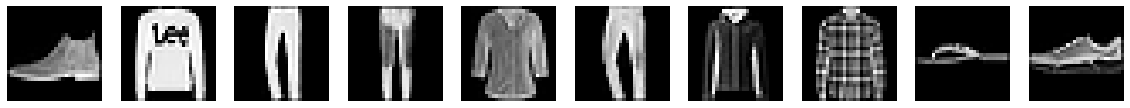

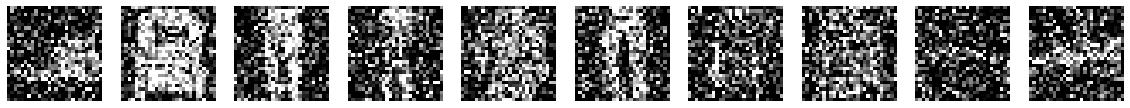

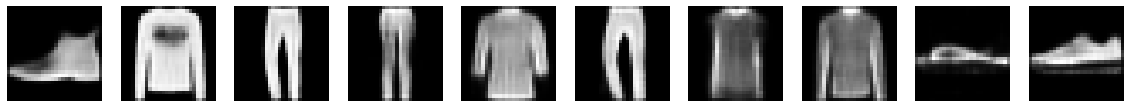

In [111]:
# NOTE: you don't need to change this code, just run it after having trained the DAE
def plot_examples(x):
    n = 10
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(x[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

x_test_reconstr = dae.predict(x_test_noisy, batch_size=batch_size)

plot_examples(x_test)
plot_examples(x_test_noisy)
plot_examples(x_test_reconstr)

**c)** Do you consider the results acceptable? Do you think they can be useful for image retrieval? Explain why in one or two sentences.

**Answer:**

We think the obtained results are indeed acceptable. The images reconstructed via our Denoising Autoencoder are recognisable except for the flipflop. However based on the noisy image of the flipflop seems like random pixels. In other of the noisy pictures there is some form recognizable. Another unrecoginizable thing is the text "LEE" on the second example picture. This is most likely due to the lack of training material for such strings.

We think that the can be used for image retrieval since no picture is ever without noise. If you know beforehand what kind of images you will get it is possible to train a Denoising Autoencoder and have it work to obtain pictures which should be somewhat the same as which you were trying to retrieve.

***

**d)** Why can we train on the full dataset `x_train` here, whereas in Tasks 2.1 and 2.2 we had to use `x_train_l` (the first 5 classes only) for training?

**Answer:**

We can do that here because we artifically add noise to the different images. Because of this none of the images which were originally in the set is still in the training sets. We can use a different noise function to obtain a test set which can be quite different than the training images. In the tasks 2.1 and 2.2 this was impossible so we needed to split up the set in order to have a training and test set. We do not need the labels from the training set to validate just the original image for DAE training. 

***

### Task 2.4: Fashion neural retrieval #4
Autoencoders come in different shapes and sizes. One key defining property of autoencoders is the means the model uses to prevent the learning of the identity function. Typically, this is done with different regularization methods. In the previous task you used a model that uses noise as a regularizer. In this task you will develop a Sparse Autoencoder (SAE). A sparse autoencoder uses a sparsity regularization to obtain sparse representations of the input data. Sparsity can be achieved by using L1-regularization on the activations of the hidden "code" layer.


**a)** Design a (convolutional) Sparse Autoencoder (SAE) for the *full* Fashion-MNIST dataset (i.e. use `x_train`, *not* `x_train_l`). For the encoder, use only Convolutional layers and Max-Pooling, followed by a Dense layer with 128 units. The output of this layer will be the "code" of the autoencoder (*HINT: you can use* `name="neural_codes"` *for this layer to make it easier to obtain features from it later*). Add an activity regularizer to this layer, using `regularizers.l1(10e-5)` from Keras.
For the decoder, start with a Dense layer to upscale to a suitable dimension, and then use only Convolutional layers and UpSampling. You may use BatchNormalization to speed up training.

Train the SAE to reconstruct input images. Make sure that it achieves a loss value of at most 0.31 on the test set (show this!). Save the trained model to a ".h5" file. (make sure you're using Keras version 2.1.3!)

In [0]:
# import regularizers for sparse autoencoder
from keras import regularizers

In [19]:
# define autoencoder
sae = Sequential()

# === SOLUTION: ===
# insert code here

sae.add(Conv2D(32, (3, 3), activation='elu', padding='same', input_shape=input_shape))
sae.add(MaxPooling2D((2, 2), padding='same'))
sae.add(BatchNormalization())
sae.add(Conv2D(32, (3, 3), activation='elu', padding='same'))
sae.add(MaxPooling2D((2, 2), padding='same'))
sae.add(BatchNormalization())
sae.add(Flatten())  
sae.add(Dense(128, activation='elu', activity_regularizer=regularizers.l1(10e-5), name="neural_codes"))  


# decoder
sae.add(Dense(1568))  
sae.add(Reshape((7, 7, 32)))
sae.add(Conv2D(32, (3, 3), activation='elu', padding='same'))
sae.add(UpSampling2D((2, 2)))
sae.add(BatchNormalization())
sae.add(Conv2D(32, (3, 3), activation='elu', padding='same'))
sae.add(UpSampling2D((2, 2)))
sae.add(BatchNormalization())
sae.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

sae.summary()
sae.compile(optimizer='adam', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
__________

In [20]:
batch_size = 32
epochs = 10

sae.fit(x_train_noisy, x_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_split=1/12)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 36s 653us/step - loss: 0.3793 - val_loss: 0.3353
Epoch 2/10
10112/55000 [====>.........................] - ETA: 27s - loss: 0.3277

55000/55000 [==============================] - 34s 621us/step - loss: 0.3124 - val_loss: 0.3004
Epoch 3/10
36416/55000 [==================>...........] - ETA: 11s - loss: 0.2992

55000/55000 [==============================] - 34s 621us/step - loss: 0.2982 - val_loss: 0.2978
Epoch 4/10
46880/55000 [========================>.....] - ETA: 4s - loss: 0.2952

55000/55000 [==============================] - 34s 619us/step - loss: 0.2949 - val_loss: 0.2957
Epoch 5/10
50976/55000 [==========================>...] - ETA: 2s - loss: 0.2925

55000/55000 [==============================] - 34s 624us/step - loss: 0.2926 - val_loss: 0.2934
Epoch 6/10
52544/55000 [===========================>..] - ETA: 1s - loss: 0.2910

55000/55000 [==============================] - 34s 624us/step - loss: 0.2910 - val_loss: 0.2934
Epoch 7/10
53216/55000 [============================>.] - ETA: 1s - loss: 0.2898

55000/55000 [==============================] - 34s 624us/step - loss: 0.2898 - val_loss: 0.2918
Epoch 8/10
53376/55000 [============================>.] - ETA: 0s - loss: 0.2890

55000/55000 [==============================] - 34s 616us/step - loss: 0.2888 - val_loss: 0.2960
Epoch 9/10
53504/55000 [============================>.] - ETA: 0s - loss: 0.2879

55000/55000 [==============================] - 34s 619us/step - loss: 0.2879 - val_loss: 0.2933
Epoch 10/10
53152/55000 [===========================>..] - ETA: 1s - loss: 0.2870

55000/55000 [==============================] - 34s 616us/step - loss: 0.2871 - val_loss: 0.2923


In [0]:
from google.colab import files
sae.save("sae_fashionmnist_l.h5")

#files.download("sae_fashionmnist_1.h5")

***

**b)** Briefly motivate how and why you chose this architecture.

**Answer:**

We chose for this architecture because it already obtained satisfactory results in the previous question with the DEA. We thought and hoped that it would perform equally good. 

***

Visualise a few test examples and their reconstructions.

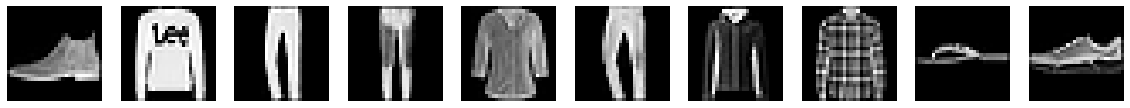

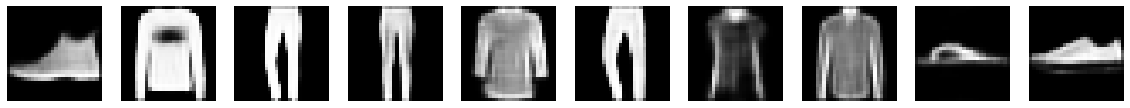

In [121]:
# NOTE: you don't need to change this code, just run it after having trained the SAE
def plot_examples(x):
    n = 10
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(x[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

x_test_reconstr = sae.predict(x_test, batch_size=batch_size)

plot_examples(x_test)
plot_examples(x_test_reconstr)

**c)** Compare the visual results to those of the DAE in Task 2.3. Also compare the loss values of the test set for the DAE and SAE. How can you explain the difference?

**Answer:**

There is a little bit of a difference between the loss values of the DAE and the one from the SAE. The SAE has slightly higher loss values but in our opinion does generate better representations of the original picture. For example the flipflop is clearly a flipflop now instead of somewhat of a blur with the DAE. The differences come from the way that both encoders generate their 'corrupted' data of the original data. For the DEA the 'corrupted' data is generated somewhat random and beforehand. This means that any possbible 'corrupted' version has a change to exists, every pixel of the image can be changed. The sparse autoencoder imposes sparcity on hidden layers, in our case on the last dense layer of the encoder. This allowes the autoencoder to learn useful structures of the data. The sparse autoencoder applies penalties on layers. In this case on the activity layer and this penalty is then incorperated into the loss function, thus explaining the higher loss values. 

***

### Task 2.5: Comparison
Obtain 128-dimensional neural code representations of the last five classes of the Fashion-MNIST dataset (the *retrieval set*: `x_train_r`) from the following models/layers:
1. The last dense hidden layer (before the output layer) of the MLP you trained in Task 2.1
2. The last dense hidden layer (before the output layer) of the CNN you trained in Task 2.2
3. The center layer/code of the DAE you trained in Task 2.3
4. The center layer/code of the SAE you trained in Task 2.4
5. A PCA-transformation

In [0]:
# additional imports
from keras.models import load_model
from keras.models import Model
from sklearn.decomposition import PCA

In [28]:
# load the previously trained and saved models
mlp = load_model("mlp_fashionmnist_l.h5")
cnn = load_model("cnn_fashionmnist_l.h5")
dae = load_model("dae_fashionmnist_l.h5")
sae = load_model("sae_fashionmnist_l.h5")
# NOTE: change the name "neural codes" if the layer from which you wish to retrieve neural codes has a different name
mlp_nc = Model(inputs=mlp.input, outputs=mlp.get_layer("neural_codes").output)
cnn_nc = Model(inputs=cnn.input, outputs=cnn.get_layer("neural_codes").output)
dae_nc = Model(inputs=dae.input, outputs=dae.get_layer("neural_codes").output)
sae_nc = Model(inputs=sae.input, outputs=sae.get_layer("neural_codes").output)

# obtain flat representations of the data
x_train_r_flat = x_train_r.reshape((x_train_r.shape[0], -1))
x_test_r_flat = x_test_r.reshape((x_test_r.shape[0], -1))

# train PCA on the retrieval set
pca = PCA(n_components=128)
pca.fit(x_train_r_flat)

# obtain 128-dimensional representations
nc_mlp_train = mlp_nc.predict(x_train_r)
nc_mlp_test = mlp_nc.predict(x_test_r)
nc_cnn_train = cnn_nc.predict(x_train_r)
nc_cnn_test = cnn_nc.predict(x_test_r)
nc_dae_train = dae_nc.predict(x_train_r)
nc_dae_test = dae_nc.predict(x_test_r)
nc_sae_train = sae_nc.predict(x_train_r)
nc_sae_test = sae_nc.predict(x_test_r)
nc_pca_train = pca.transform(x_train_r_flat)
nc_pca_test = pca.transform(x_test_r_flat)

# print the shapes to confirm all features are 128-dimensional
print(nc_mlp_train.shape)
print(nc_mlp_test.shape)
print(nc_cnn_train.shape)
print(nc_cnn_test.shape)
print(nc_dae_train.shape)
print(nc_dae_test.shape)
print(nc_sae_train.shape)
print(nc_sae_test.shape)
print(nc_pca_train.shape)
print(nc_pca_test.shape)

(30000, 128)
(5000, 128)
(30000, 128)
(5000, 128)
(30000, 128)
(5000, 128)
(30000, 128)
(5000, 128)
(30000, 128)
(5000, 128)


***

**a)** Evaluate the retrieval task as described in Question 1 on the last 5 classes (the retrieval set) of the Fashion-MNIST dataset, for the five data representations given above. Use query images from the test set and retrieve images from the training set only. Print the five resulting retrieval scores (between 0 and 5).

*HINT: you can use* `y_train_digits_r` *and* `y_test_digits_r` *to obtain digit encodings (as opposed to one-hot encodings) of the data labels.*

In [66]:
!pip install itertools

  Could not find a version that satisfies the requirement itertools (from versions: )
No matching distribution found for itertools


In [80]:
# make random selection of n query images/indices, the same for all experiments
n = 200
n_examples = 5000  # the retrieval test set has 5000 images
indices = np.random.choice(range(n_examples), size=n, replace=False)
scores=[0,0,0,0,0]
p = 0
#print(y_train_digits_r)
representations = [
    (nc_mlp_train, nc_mlp_test),
    (nc_cnn_train, nc_cnn_test),
    (nc_dae_train, nc_dae_test),
    (nc_sae_train, nc_sae_test),
    (nc_pca_train, nc_pca_test),
]
for (nc_train, nc_test) in representations:
    # === SOLUTION: ===
    # insert code here
    neigh = NearestNeighbors(n_neighbors=5, p=2)
    neigh.fit(nc_train)
    QI = nc_test[indices]
    nn = neigh.kneighbors(QI)
    for i in nn[1]:
      for k, l  in zip(i[:-1], i[1:]):
        #print(k, l)
        label = y_train[k]
        label_digit = y_train_digits[k]
        label_class_j = classes[label_digit]
        #print(label_class)
        label = y_train[l]
        label_digit = y_train_digits[l]
        label_class_k = classes[label_digit]
        #print(label_class)
        if label_class_j == label_class_k:
          scores[p] +=1
    p += 1
for s in scores:
  q = s/200
  print(q)

0.4
0.4
0.485
0.335
0.52


***

**b)** Compare the "baseline" PCA-transformed data with the other methods. Is PCA a suitable method to obtain representations for image retrieval in this situation? Why do you think so? Would you expect a similar conclusion for the Caltech101 dataset from Question 1?

**Answer:**

We think that PCA is a suitable method to obtain representations for image retrieval. Out of all the three different models it obtains the best score. Ofcourse all of them don't achieve a spectecular score (most are less than 0.5). Since it is quite random for them to select items from the training set based on images out of the test set. However based on the scores we see that PCA does not only perform as well it performs even better then our trained models. We think this is due to the fact that there are quite a large differences between the different classes in the training set of which the images are chosen. The also do not really compare to the classes in the test set. 

We expect the same result for the Caltech101 dataset since here also there are quite some different classes. However it could play a factor that in those pictures there is color as well which is not present in the FASHION-MINST data set.

***

Observe the difference between encodings from the DAE and SAE.

In [84]:
print("Mean activation for DAE encodings:", np.mean(nc_dae_train))
print("Mean activation for SAE encodings:", np.mean(nc_sae_train))

index = 9000  # try a few indices here
print("DAE encoding example:")
print(nc_dae_train[index])
print("SAE encoding example:")
print(nc_sae_train[index])

Mean activation for DAE encodings: 3.442056
Mean activation for SAE encodings: -0.00017243795
DAE encoding example:
[ 2.83382630e+00 -9.98998106e-01 -9.95019734e-01 -7.43273079e-01
 -9.42138851e-01 -9.99733448e-01 -9.98841822e-01  2.29535084e+01
  9.52881241e+00  1.87907219e+00 -1.00000000e+00  1.34943123e+01
  9.93903828e+00 -9.99506056e-01  6.09373856e+00 -9.98469472e-01
 -9.99911487e-01  1.11554861e+01 -9.65158641e-01 -9.91949856e-01
  2.97600722e+00 -9.99993503e-01 -9.69555378e-01 -9.99689400e-01
 -5.69364727e-01  1.39413226e+00  6.23614550e+00  8.58841133e+00
 -9.99770880e-01 -9.99563694e-01  1.06557169e+01  5.51328135e+00
 -9.92507696e-01  4.86196578e-03 -9.85668480e-01  2.74740434e+00
  6.03305674e+00  5.08033371e+00 -9.99938905e-01 -9.99669135e-01
 -5.35120487e-01  2.18159959e-01 -8.84691238e-01 -9.94392157e-01
 -9.42477942e-01 -9.99991834e-01 -4.34415936e-01 -9.99806225e-01
 -9.88536239e-01  5.49327326e+00  1.54768925e+01 -1.93113625e-01
  8.17384815e+00  8.09881115e+00 -9.985

**c)** Discuss the difference in encodings between the two autoencoders (denoising and sparse). Also discuss the difference in retrieval performance for these encodings. How would you explain this difference?

**Answer:**

There is quite a difference between the different mean activations. It seems that in almost every case the DAE encoding is way more positive than the SAE encoding. We think that it is due to the fact that the DAE encoding looks at a lot of different aspects of the image. It tries to find what are key features for certain classes. The SEA encoding tries to find hidden features in the data. We expect that because of that the encoding is a lot less positive 

***

**d)** What is the best performing method you found in part a)? Describe what advantage you believe this method has over the others.

**Answer:**

*=== write your answer here ===*